# Deep model explainability with SHAP values

In [19]:
# import torch
import numpy as np
import pandas as pd
# import shap
import h5py
import importlib
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from brain_age_prediction import models, utils, viz
importlib.reload(utils)
importlib.reload(viz)

<module 'brain_age_prediction.viz' from '/home/laurar/brain_age_1D-CNN/src/brain_age_prediction/viz.py'>

In [2]:
# paths to best model checkpoint
deep_model_path = 'lightweight-brain-age-prediction/nx218mm3/checkpoints/epoch=26-step=6102.ckpt'
# paths to saved predictions
save_dir = '/ritter/share/projects/laura_riedel_thesis/shap_values.hdf5'

# get brain area / network names
network_names = utils.get_network_names()
# load colour maps
network_colour_map = viz.get_colour_map('network')
area_colour_map = viz.get_colour_map('area')

In [3]:
%%time
# load predictions
with h5py.File(save_dir, 'r') as f:
    deep_shap = f['deep']['full'][()]
print('Shape of SHAP values:', deep_shap.shape)

# load deep model
# deep_model = models.deep1DCNN.load_from_checkpoint(deep_model_path)
# deep_model.eval()

Shape of SHAP values: (5000, 100, 490)
CPU times: user 9.96 s, sys: 2.17 s, total: 12.1 s
Wall time: 17.4 s


Create dataframe to sort values according to their contribution

In [4]:
deep_mean_area = np.mean(np.mean(np.abs(deep_shap),axis=2),axis=0)

deep_shap_df = pd.DataFrame(network_names, columns=['parcellation'])
deep_shap_df = utils.add_specific_network_columns(deep_shap_df, insert_start=1)
deep_shap_df['mean SHAP'] = deep_mean_area

In [32]:
# 20 highest mean SHAP values
deep_shap_df.sort_values(by=['mean SHAP'], ascending=False).head(20)

parcellation hemisphere      network         area  \
59                 RH_SomMot_2         RH       SomMot  full SomMot   
75  RH_SalVentAttn_FrOperIns_1         RH  SalVentAttn    FrOperIns   
64                 RH_SomMot_7         RH       SomMot  full SomMot   
62                 RH_SomMot_5         RH       SomMot  full SomMot   
98        RH_Default_pCunPCC_1         RH      Default      pCunPCC   
24  LH_SalVentAttn_FrOperIns_1         LH  SalVentAttn    FrOperIns   
27        LH_SalVentAttn_Med_1         LH  SalVentAttn          Med   
25  LH_SalVentAttn_FrOperIns_2         LH  SalVentAttn    FrOperIns   
52                    RH_Vis_3         RH          Vis     full Vis   
4                     LH_Vis_5         LH          Vis     full Vis   
58                 RH_SomMot_1         RH       SomMot  full SomMot   
53                    RH_Vis_4         RH          Vis     full Vis   
9                  LH_SomMot_1         LH       SomMot  full SomMot   
32        LH_Limbic_TempPole_2         LH       Limbic     TempPole   
18          LH_DorsAttn_Post_4         LH     DorsAttn         Post   
35              LH_Cont_pCun_1         LH         Cont         pCun   
28        LH_SalVentAttn_Med_2         LH  SalVentAttn          Med   
29        LH_SalVentAttn_Med_3         LH  SalVentAttn          Med   
22           LH_DorsAttn_FEF_1         LH     DorsAttn          FEF   
87             RH_Cont_PFCmp_1         RH         Cont        PFCmp   

    mean SHAP  max SHAP  
59   0.002674  0.022498  
75   0.002109  0.020505  
64   0.002065  0.016336  
62   0.002063  0.019171  
98   0.001980  0.015460  
24   0.001954  0.018250  
27   0.001932  0.017056  
25   0.001927  0.016696  
52   0.001901  0.016656  
4    0.001775  0.014997  
58   0.001752  0.019641  
53   0.001745  0.015339  
9    0.001718  0.018326  
32   0.001702  0.014214  
18   0.001696  0.016595  
35   0.001696  0.016198  
28   0.001653  0.013242  
29   0.001632  0.014656  
22   0.001570  0.014653  
87   0.001522  0.014923

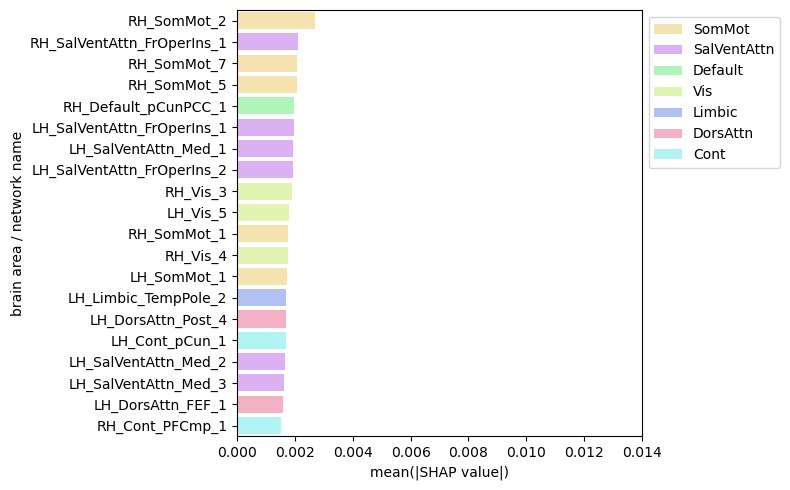

In [34]:
subset = deep_shap_df.sort_values(by=['mean SHAP'], ascending=False)[:20].copy()
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=subset,
            x='mean SHAP',
            y='parcellation',
            orient='h',
            hue='network',
            palette=network_colour_map,
            dodge=False,
            ax=ax)
ax.set(xlabel='mean(|SHAP value|)',
       ylabel='brain area / network name',
       title='20 highest ranking attributions',
       )
ax.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
ax.set_xlim(0,0.014)
fig.tight_layout()
# fig.savefig('../../viz/SHAP_global_20highest_nw_deep.png')
fig.show()

## Create long table for easier visualisations

In [4]:
shap_df, area_mean_df = utils.create_long_df(deep_shap)

In [163]:
shap_df

id           parcellation hemisphere  network      area  \
0       1084205               LH_Vis_1         LH      Vis  full Vis   
1       1364685               LH_Vis_1         LH      Vis  full Vis   
2       1378042               LH_Vis_1         LH      Vis  full Vis   
3       1243331               LH_Vis_1         LH      Vis  full Vis   
4       1174601               LH_Vis_1         LH      Vis  full Vis   
...         ...                    ...        ...      ...       ...   
499995  1264831  RH_Default_PFCdPFCm_3         RH  Default  PFCdPFCm   
499996  1251835  RH_Default_PFCdPFCm_3         RH  Default  PFCdPFCm   
499997  1525394  RH_Default_PFCdPFCm_3         RH  Default  PFCdPFCm   
499998  1238019  RH_Default_PFCdPFCm_3         RH  Default  PFCdPFCm   
499999  1099323  RH_Default_PFCdPFCm_3         RH  Default  PFCdPFCm   

            shap  mean area shap  area weight  
0       0.001303        0.001266        1.000  
1       0.001206        0.001266        1.000  
2       0.001294        0.001266        1.000  
3       0.001356        0.001266        1.000  
4       0.001195        0.001266        1.000  
...          ...             ...          ...  
499995  0.001355        0.001224        0.125  
499996  0.001240        0.001224        0.125  
499997  0.001284        0.001224        0.125  
499998  0.001364        0.001224        0.125  
499999  0.001355        0.001224        0.125  

[500000 rows x 8 columns]

In [14]:
area_mean_df

network              area  area weight  mean area shap
0           Vis          full Vis     1.000000        0.001266
1        SomMot       full SomMot     1.000000        0.001595
2      DorsAttn              Post     0.733333        0.001271
3      DorsAttn              PrCv     0.133333        0.001282
4      DorsAttn               FEF     0.133333        0.001387
5   SalVentAttn               Med     0.416667        0.001526
6   SalVentAttn         FrOperIns     0.250000        0.001997
7   SalVentAttn        TempOccPar     0.166667        0.001280
8   SalVentAttn           ParOper     0.083333        0.001141
9   SalVentAttn  PFCl SalVentAttn     0.083333        0.001296
10       Limbic          TempPole     0.600000        0.001461
11       Limbic               OFC     0.400000        0.001237
12         Cont         PFCl Cont     0.384615        0.001103
13         Cont          Par Cont     0.230769        0.001141
14         Cont              pCun     0.153846        0.001378
15         Cont              Cing     0.153846        0.001391
16         Cont             PFCmp     0.076923        0.001522
17      Default               PFC     0.291667        0.001179
18      Default              Temp     0.208333        0.001316
19      Default           pCunPCC     0.166667        0.001417
20      Default       Par Default     0.125000        0.001161
21      Default          PFCdPFCm     0.125000        0.001224
22      Default              PFCv     0.083333        0.001217

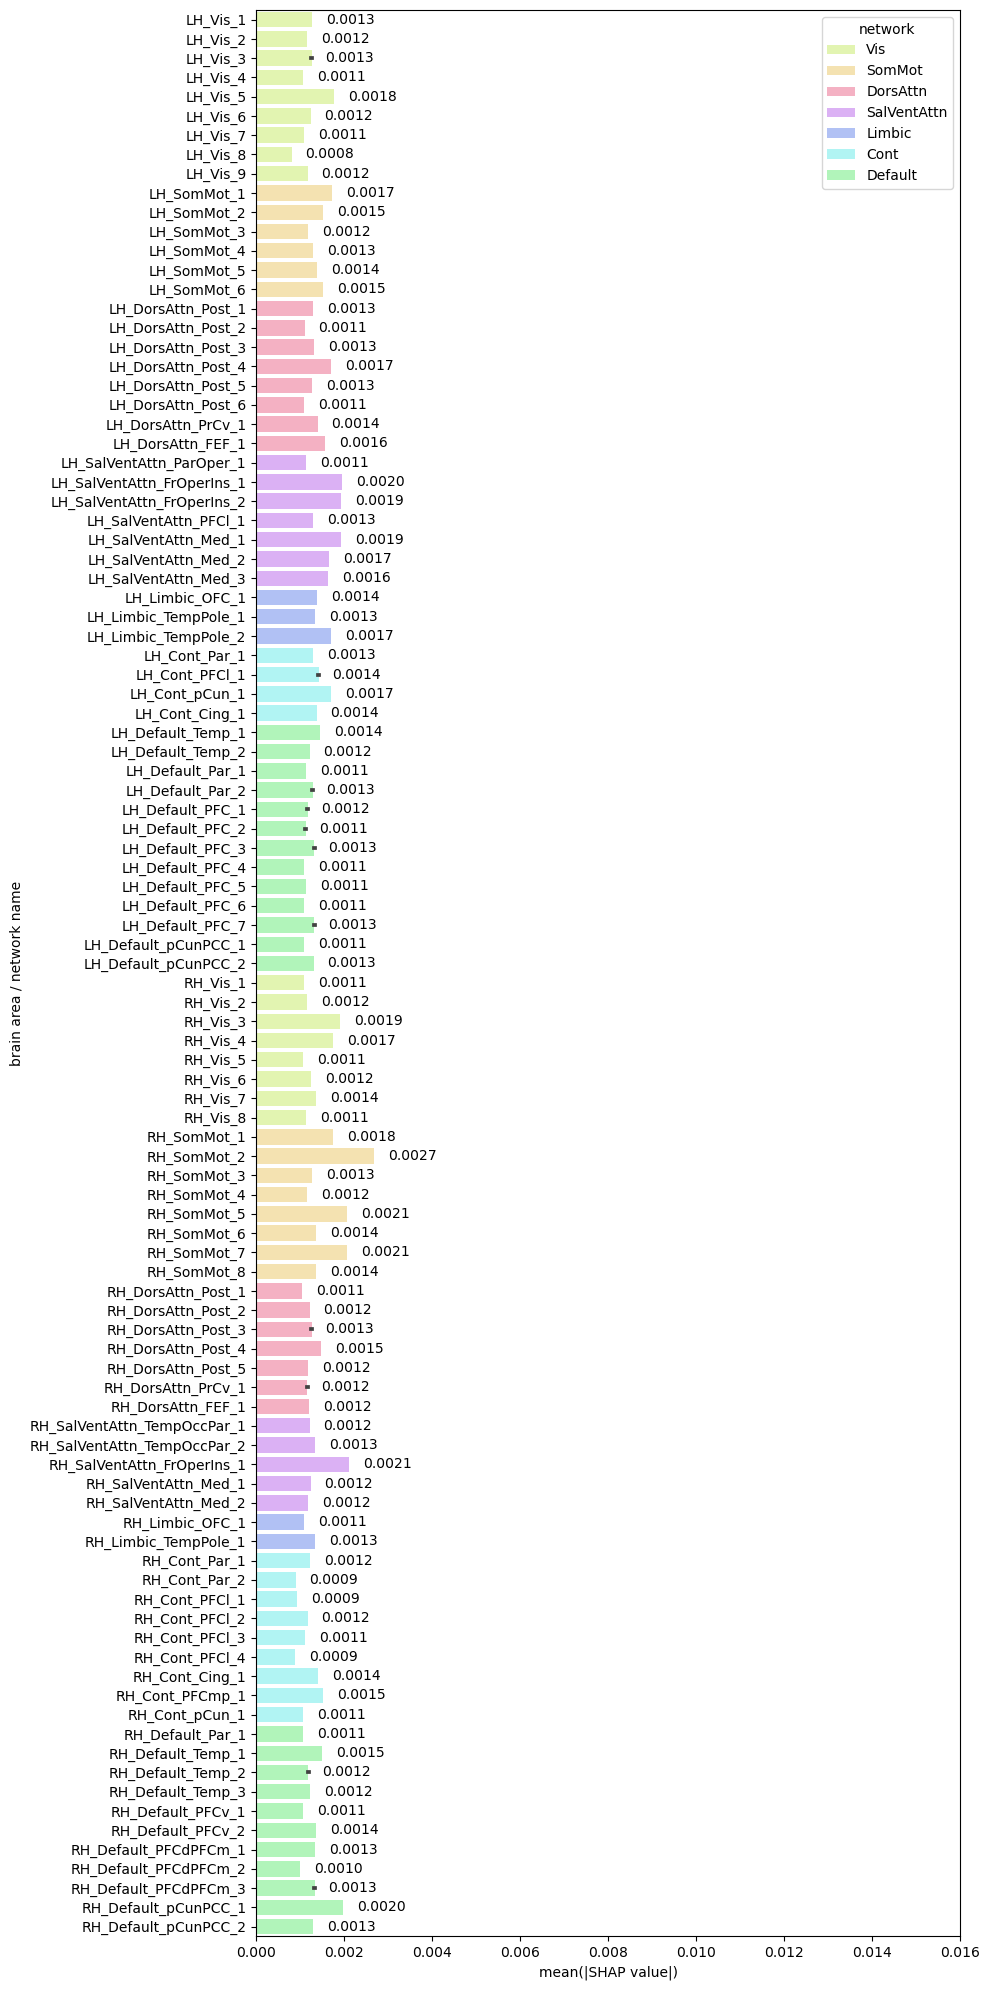

In [6]:
fig, ax = plt.subplots(figsize=(10,20))
sns.barplot(data=shap_df,
            x='shap',
            y='parcellation',
            orient='h',
            hue='network',
            palette=network_colour_map,
            dodge=False,
            ax=ax)
ax.set(xlabel='mean(|SHAP value|)',
       ylabel='brain area / network name')
for container in ax.containers:
    ax.bar_label(container,padding=10, fmt='%.4f')
ax.set_xlim(0,0.016)
fig.tight_layout()
fig.savefig('../../viz/SHAP_global_all_nw_deep.png')
fig.show()

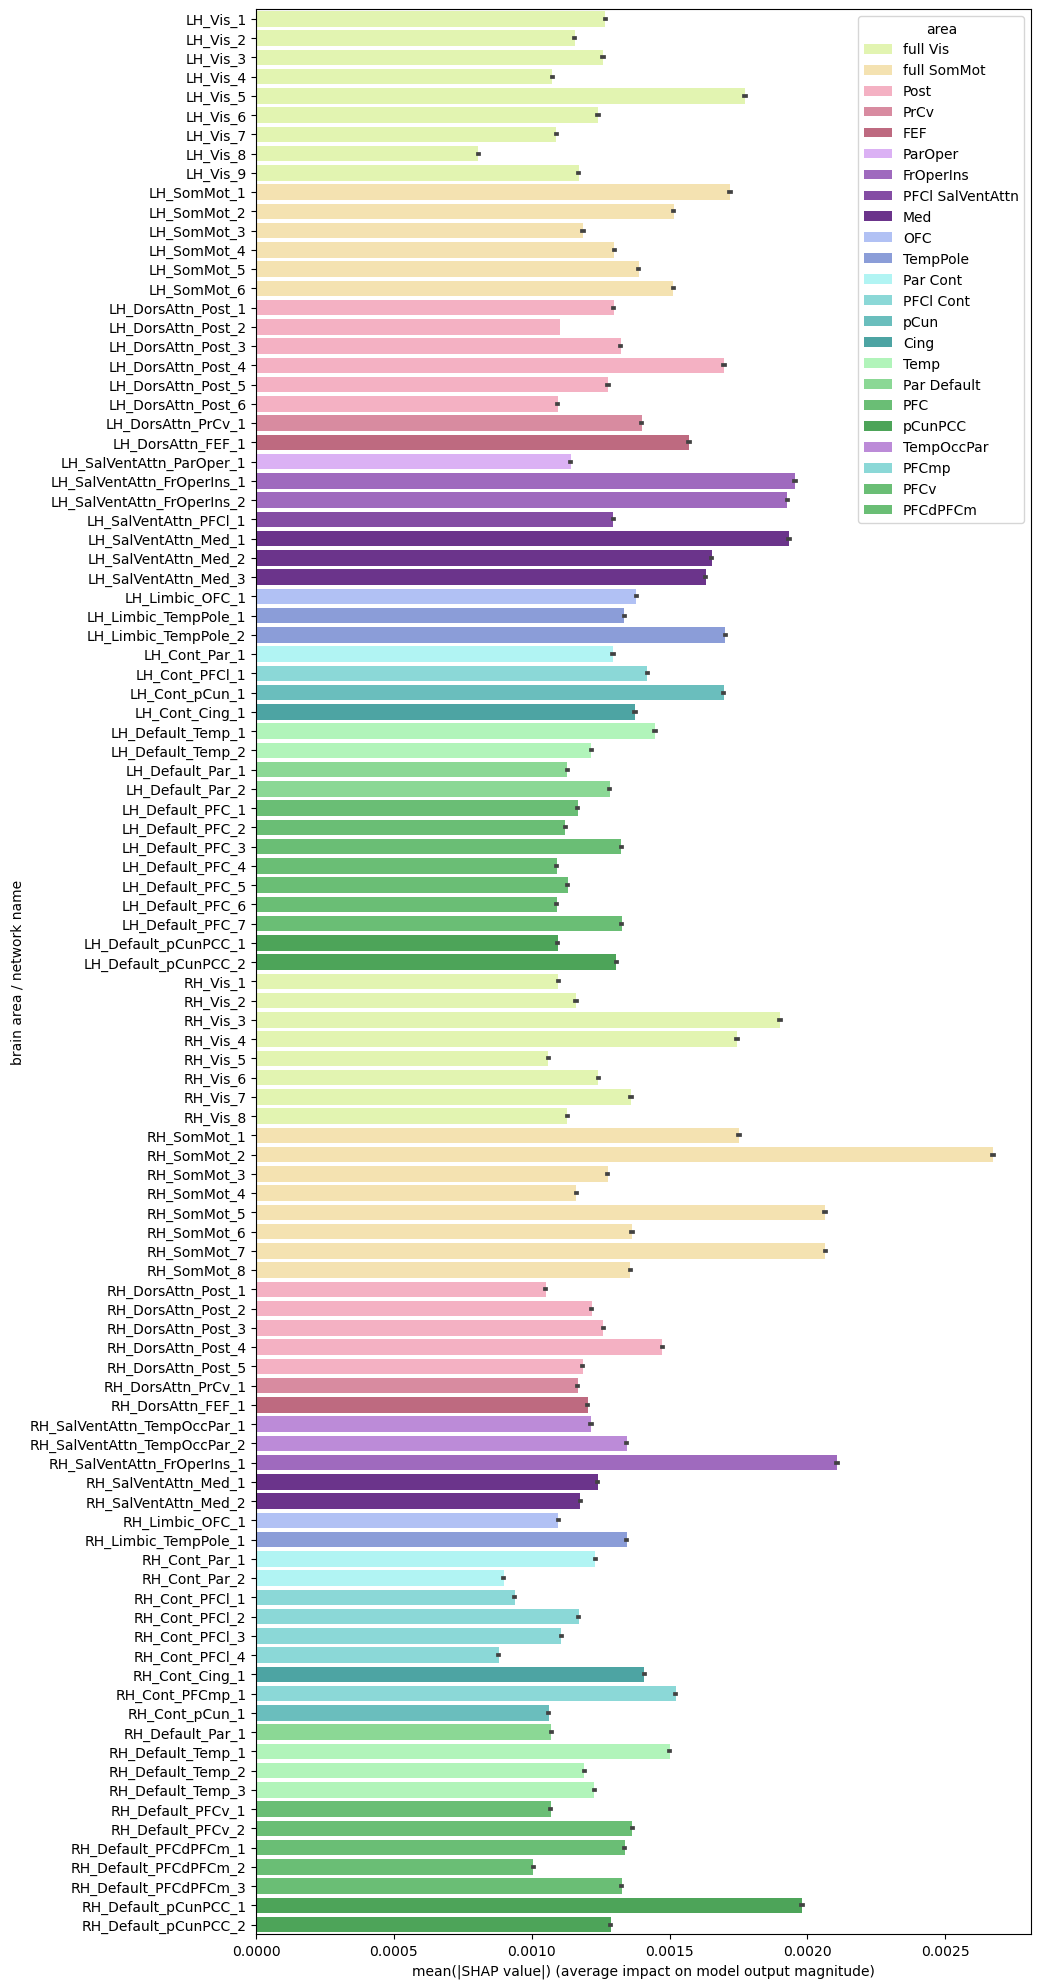

In [11]:
fig, ax = plt.subplots(figsize=(10,25))
sns.barplot(data=shap_df,
            x='shap',
            y='parcellation',
            orient='h',
            hue='area',
            palette=area_colour_map,
            dodge=False,
            ax=ax)
ax.set(xlabel='mean(|SHAP value|) (average impact on model output magnitude)',
       ylabel='brain area / network name')
plt.show()

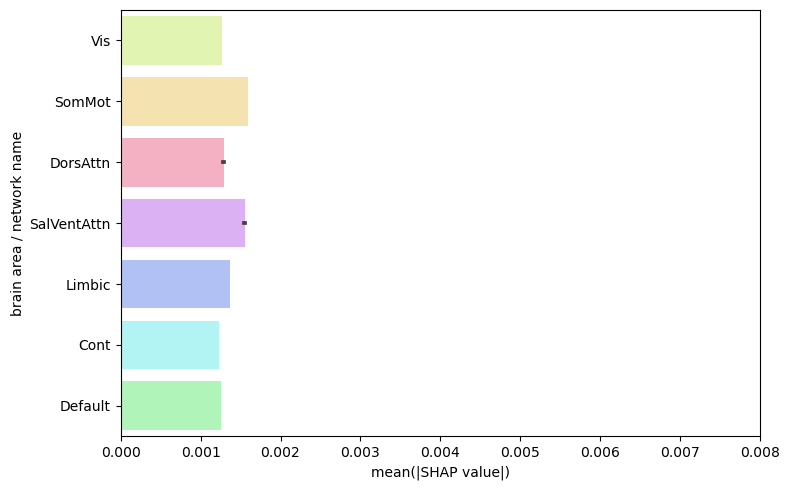

In [7]:
# "raw" network mean
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=shap_df,
            x='shap',
            y='network',
            orient='h',
            hue='network',
            palette=network_colour_map,
            dodge=False,
            ax=ax)
ax.set(xlabel='mean(|SHAP value|)',
       ylabel='brain area / network name')
ax.legend_.remove()
ax.set_xlim(0,0.008)
fig.tight_layout()
fig.show()

In [8]:
weighted_networks_df = utils.get_weighted_network_average(shap_df)
weighted_networks_df

network  weighted mean
0          Vis       0.001266
1       SomMot       0.001595
2     DorsAttn       0.001275
3  SalVentAttn       0.001592
4       Limbic       0.001392
5         Cont       0.001173
6      Default       0.001247

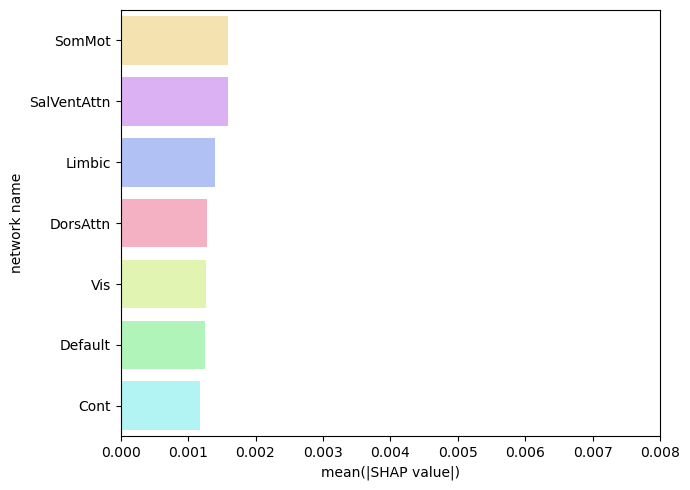

In [9]:
# weighted network mean
sort_order = weighted_networks_df.sort_values('weighted mean', ascending=False).network
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(data=weighted_networks_df,
            x='weighted mean',
            y='network',
            orient='h',
            hue='network',
            palette=network_colour_map,
            dodge=False,
            order=sort_order,
            ax=ax)
ax.set(xlabel='mean(|SHAP value|)',
       ylabel='network name')
ax.legend_.remove()
ax.set_xlim(0,0.008)
fig.tight_layout()
# fig.savefig('../../viz/SHAP_global_weighted_nw_mean_deep.png')
plt.show()

In [87]:
shap_df.loc[:,['shap','network']].groupby('network').mean()

shap
network              
Cont         0.001231
Default      0.001254
DorsAttn     0.001288
Limbic       0.001371
SalVentAttn  0.001552
SomMot       0.001595
Vis          0.001266

In [102]:
shap_df.loc[:,['shap','network','area']].groupby(['network','area']).mean()

shap
network     area                      
Cont        Cing              0.001391
            PFCl Cont         0.001103
            PFCmp             0.001522
            Par Cont          0.001141
            pCun              0.001378
Default     PFC               0.001179
            PFCdPFCm          0.001224
            PFCv              0.001217
            Par Default       0.001161
            Temp              0.001316
            pCunPCC           0.001417
DorsAttn    FEF               0.001387
            Post              0.001271
            PrCv              0.001282
Limbic      OFC               0.001237
            TempPole          0.001461
SalVentAttn FrOperIns         0.001997
            Med               0.001526
            PFCl SalVentAttn  0.001296
            ParOper           0.001141
            TempOccPar        0.001280
SomMot      full SomMot       0.001595
Vis         full Vis          0.001266

## Local explanations

In [5]:
young_sub = utils.get_sub_shap(deep_shap, 1137757)
old_sub = utils.get_sub_shap(deep_shap, 1318155)
younger_pred_sub = utils.get_sub_shap(deep_shap, 1184162)
older_pred_sub = utils.get_sub_shap(deep_shap, 1364474)
min_bag_diff_sub = utils.get_sub_shap(deep_shap, 1031078)
max_bag_diff_sub = utils.get_sub_shap(deep_shap, 1457519)

In [85]:
def simple_heatmap(data, figsize=(60,10)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(data,cmap="PuOr", center=0, square=True,
                ax=ax, xticklabels='auto', yticklabels='auto');

Show heatmaps with standardised SHAP values (per channel)

In [7]:
from scipy.stats import zscore

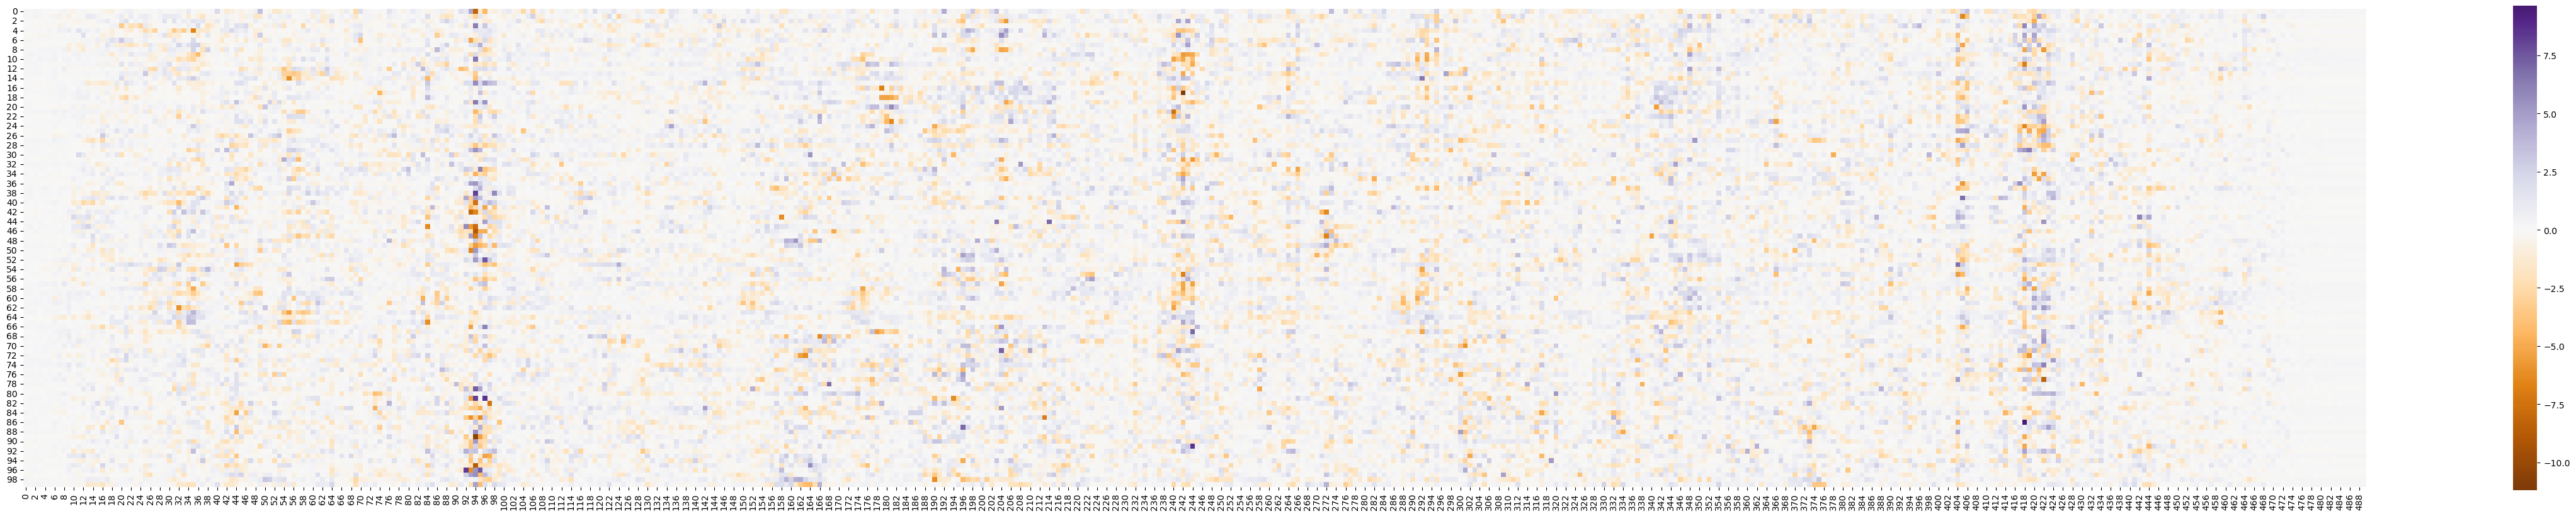

In [96]:
simple_heatmap(zscore(young_sub, axis=1), (60,10))

In [10]:
path_to_mc = '/home/laurar/brain_age_1D-CNN/data/schaefer/mc/prefiltered_func_data_mcf_1318155.par'

In [11]:
old_sub_headmotion = np.loadtxt(path_to_mc)
old_sub_headmotion.shape

(490, 6)

In [9]:
old_sub_headmotion

array([[-3.65363e-03,  5.80787e-04,  1.56235e-03,  1.28792e-02,
         1.57125e-01,  2.00804e-01],
       [-3.76379e-03,  2.71753e-04,  1.64918e-03,  6.42770e-03,
         1.44304e-01,  2.20486e-01],
       [-4.22890e-03,  3.99090e-04,  1.76186e-03,  7.28510e-03,
         1.79381e-01,  2.69392e-01],
       ...,
       [-5.54044e-03, -2.77386e-03,  6.17213e-03,  6.68055e-02,
         2.98546e-01,  3.23545e-01],
       [-4.54566e-03, -2.06456e-03,  6.20010e-03,  7.11413e-02,
         2.11305e-01,  2.51191e-01],
       [-4.41480e-03, -2.06528e-03,  6.29832e-03,  7.34385e-02,
         2.17091e-01,  2.16912e-01]])

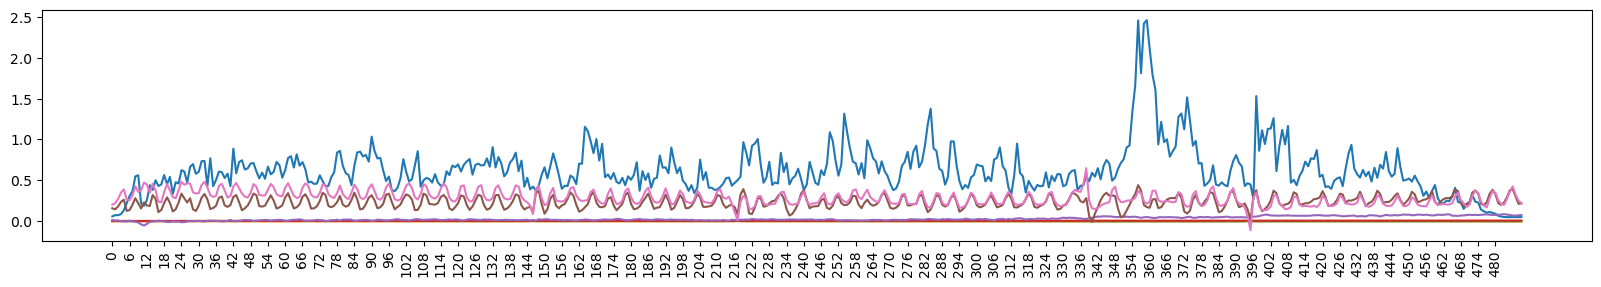

In [27]:
plt.figure(figsize=(20,3))
plt.xticks(range(0,486,6), rotation=90)
plt.plot(np.mean(np.abs(zscore(old_sub, axis=1)), axis=0))
for i in range(6):
    plt.plot(old_sub_headmotion[:,i])

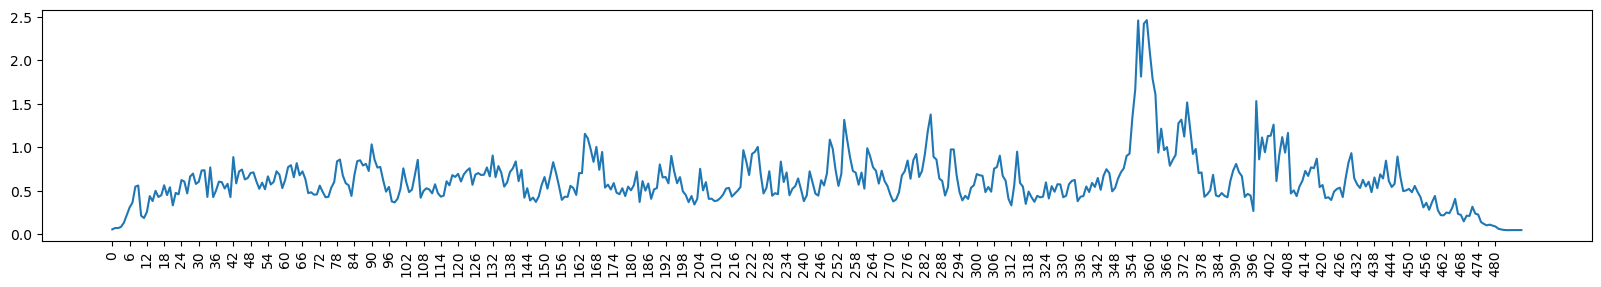

In [26]:
plt.figure(figsize=(20,3))
plt.xticks(range(0,486,6), rotation=90)
plt.plot(np.mean(np.abs(zscore(old_sub, axis=1)), axis=0))

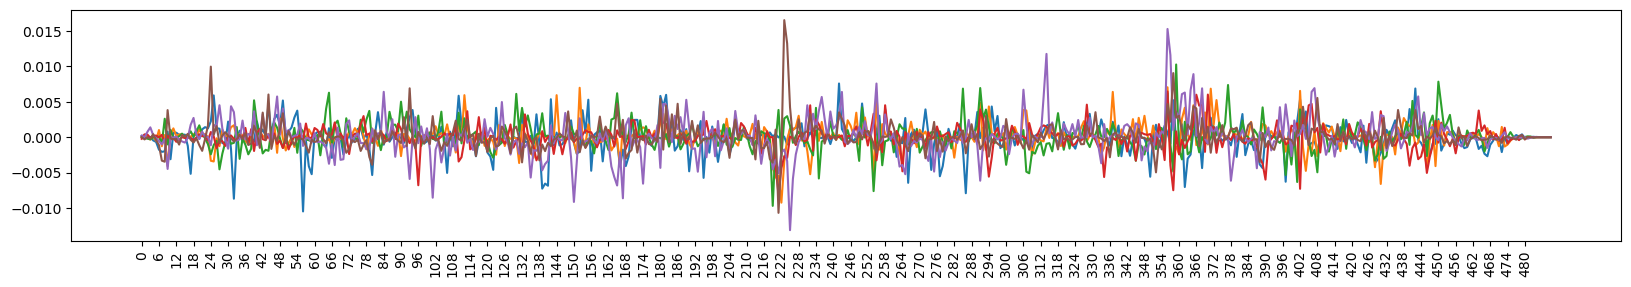

In [21]:
plt.figure(figsize=(20,3))
plt.xticks(range(0,486,6), rotation=90)
for i in range(6):
    plt.plot(old_sub[i,:])

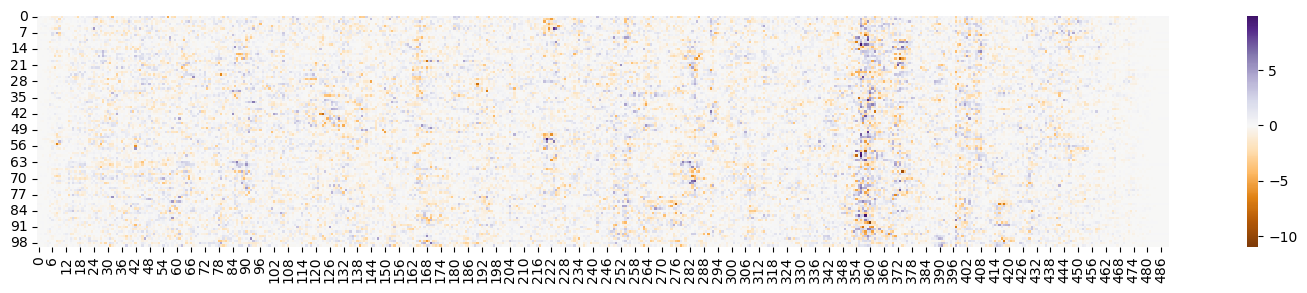

In [86]:
simple_heatmap(zscore(old_sub, axis=1), (20,3))

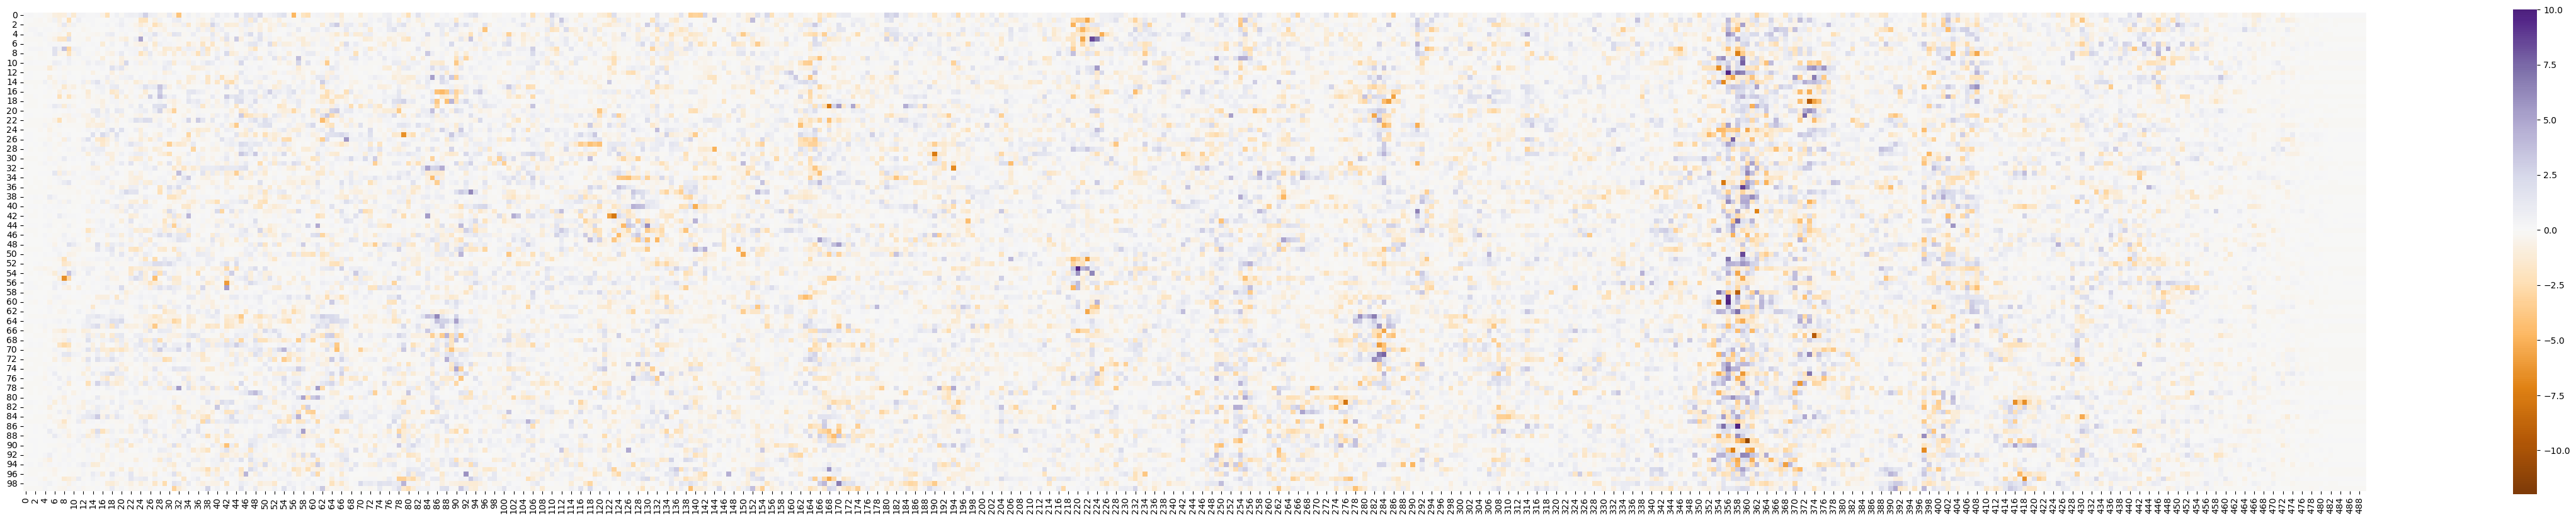

In [44]:
simple_heatmap(zscore(old_sub, axis=1), (60,10))

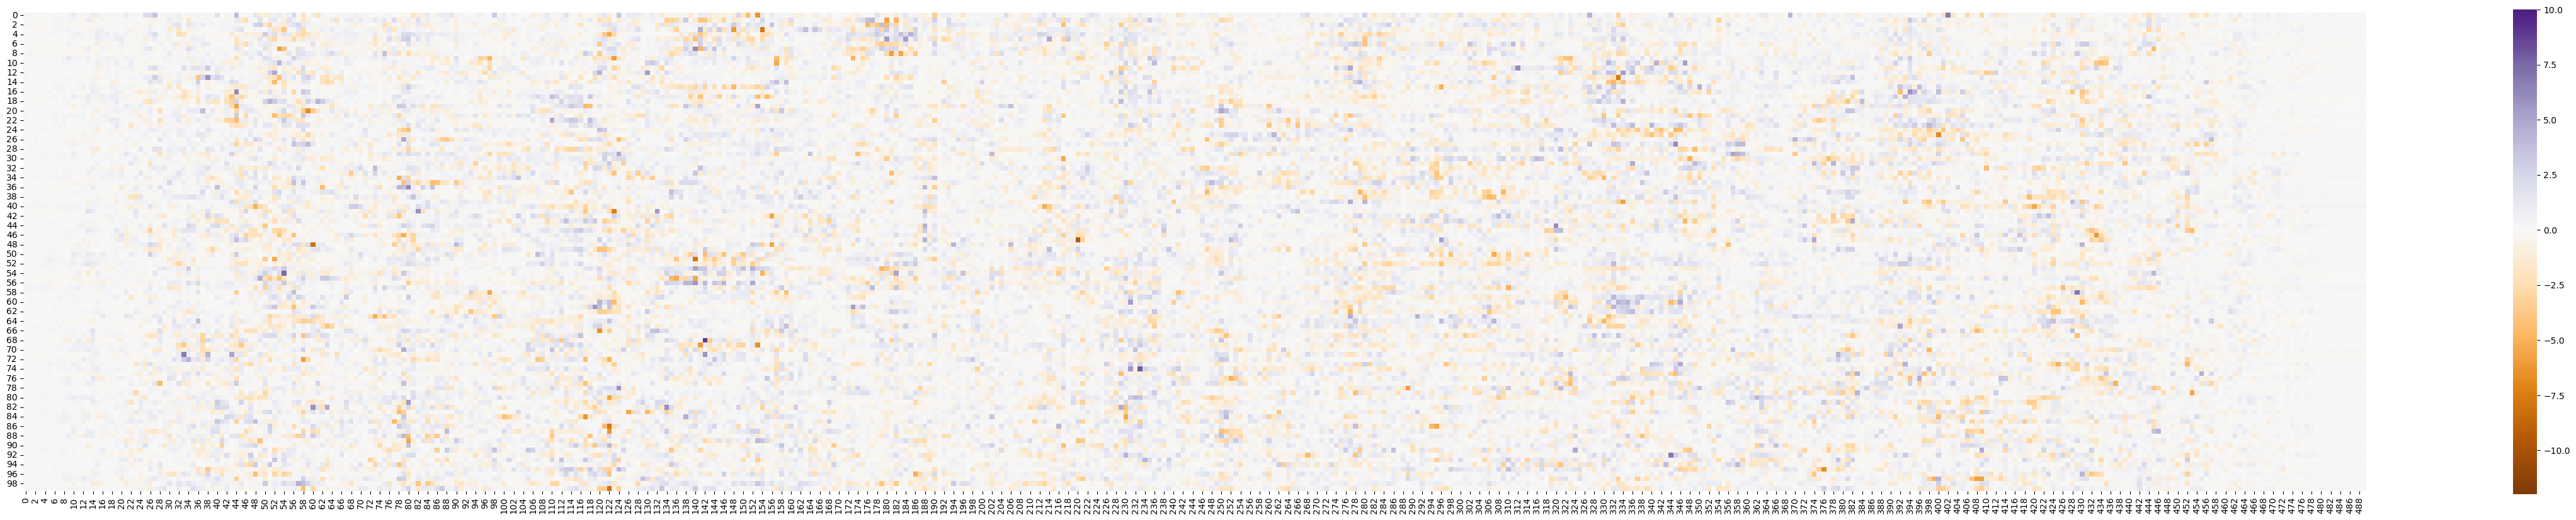

In [45]:
simple_heatmap(zscore(younger_pred_sub, axis=1), (60,10))

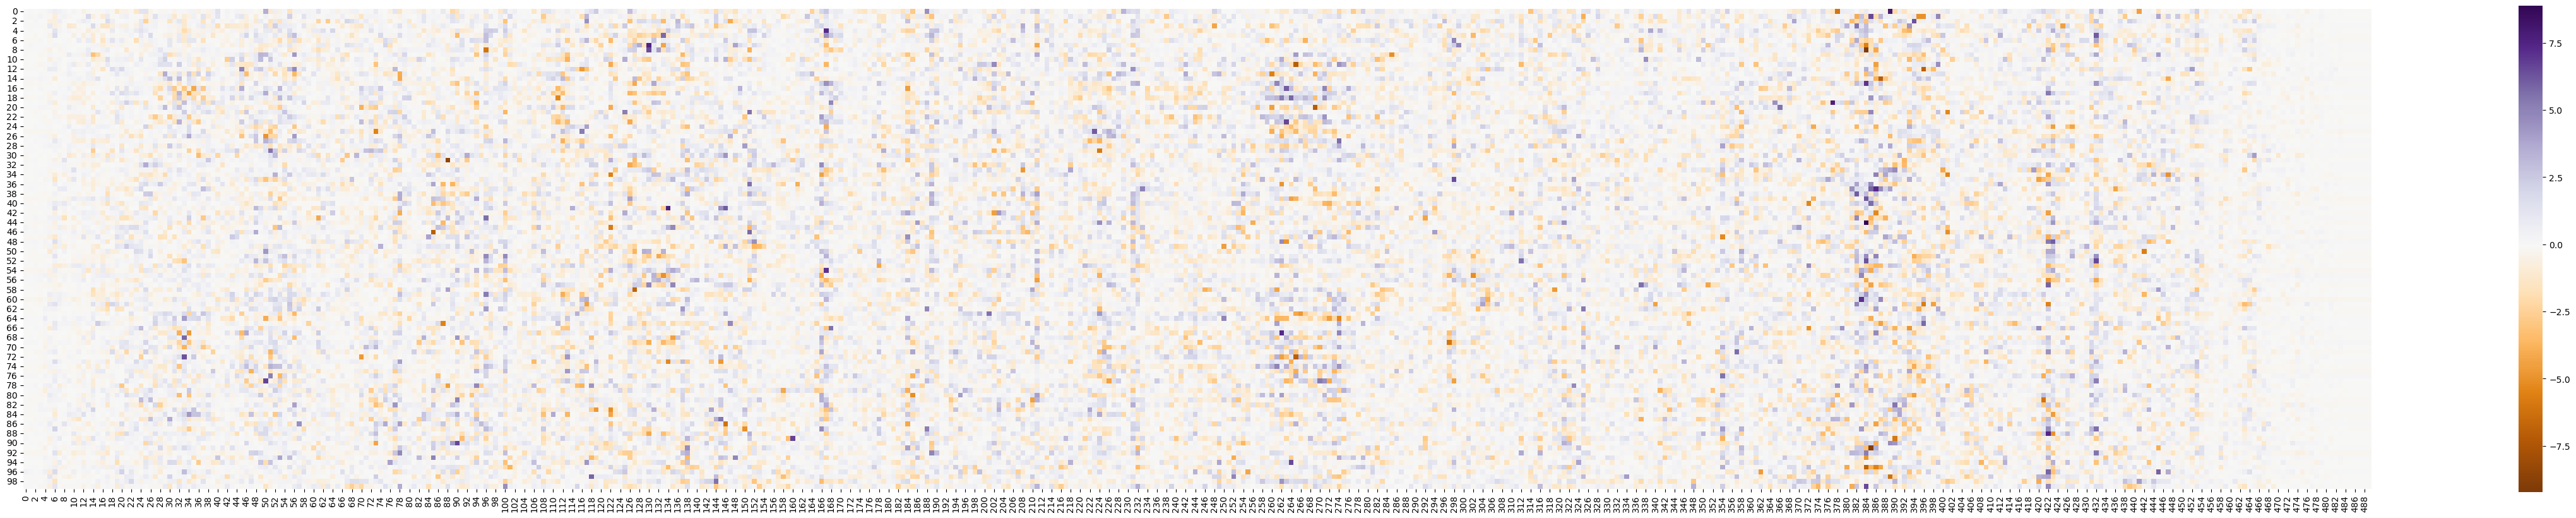

In [99]:
simple_heatmap(zscore(older_pred_sub, axis=1), (60,10))

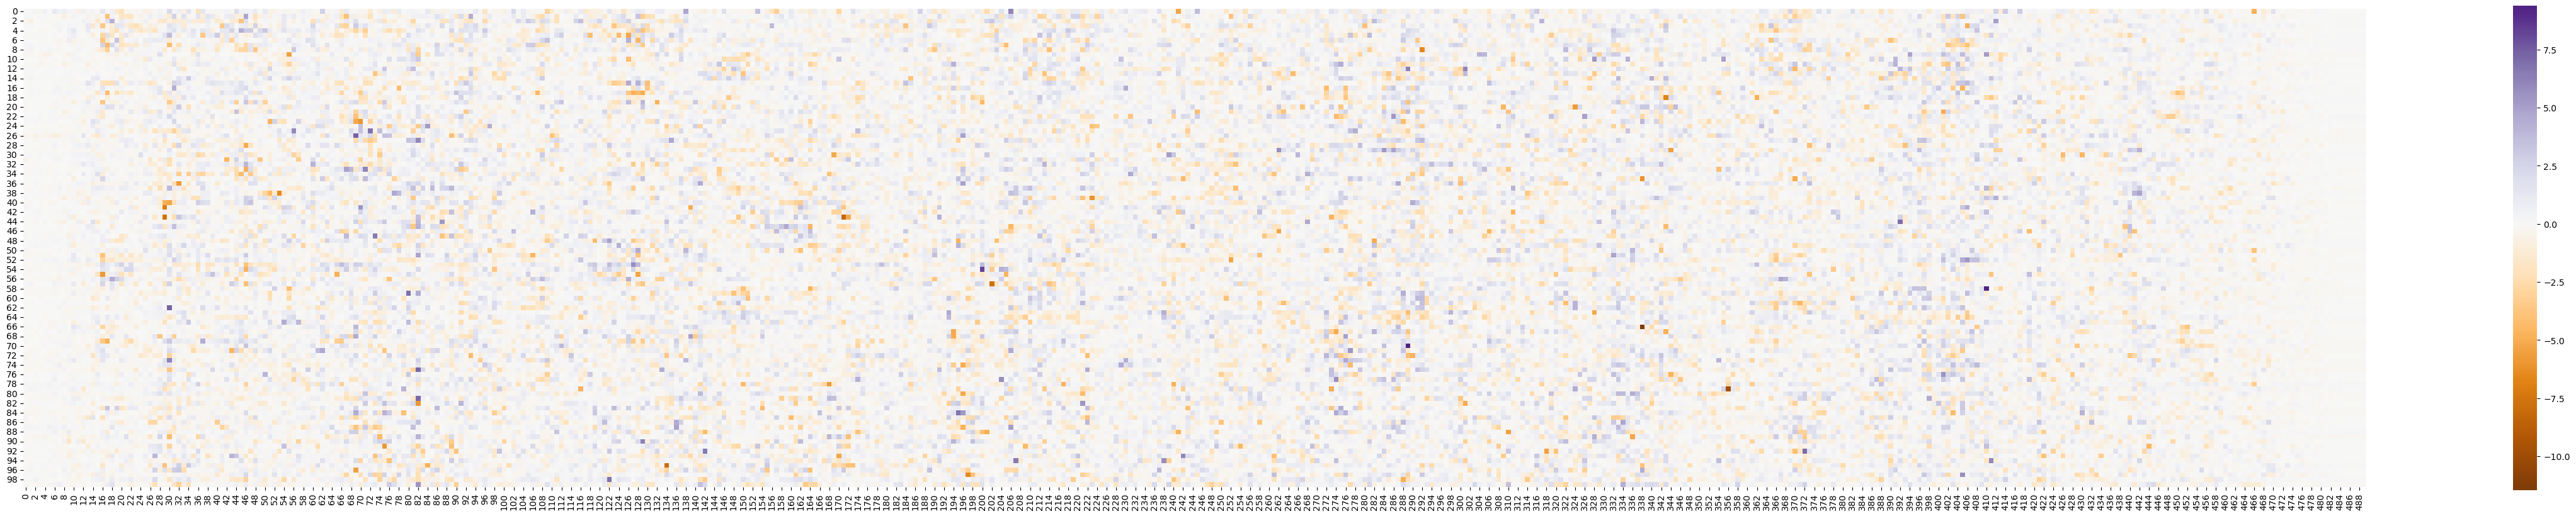

In [30]:
simple_heatmap(zscore(min_bag_diff_sub, axis=1), (60,10))

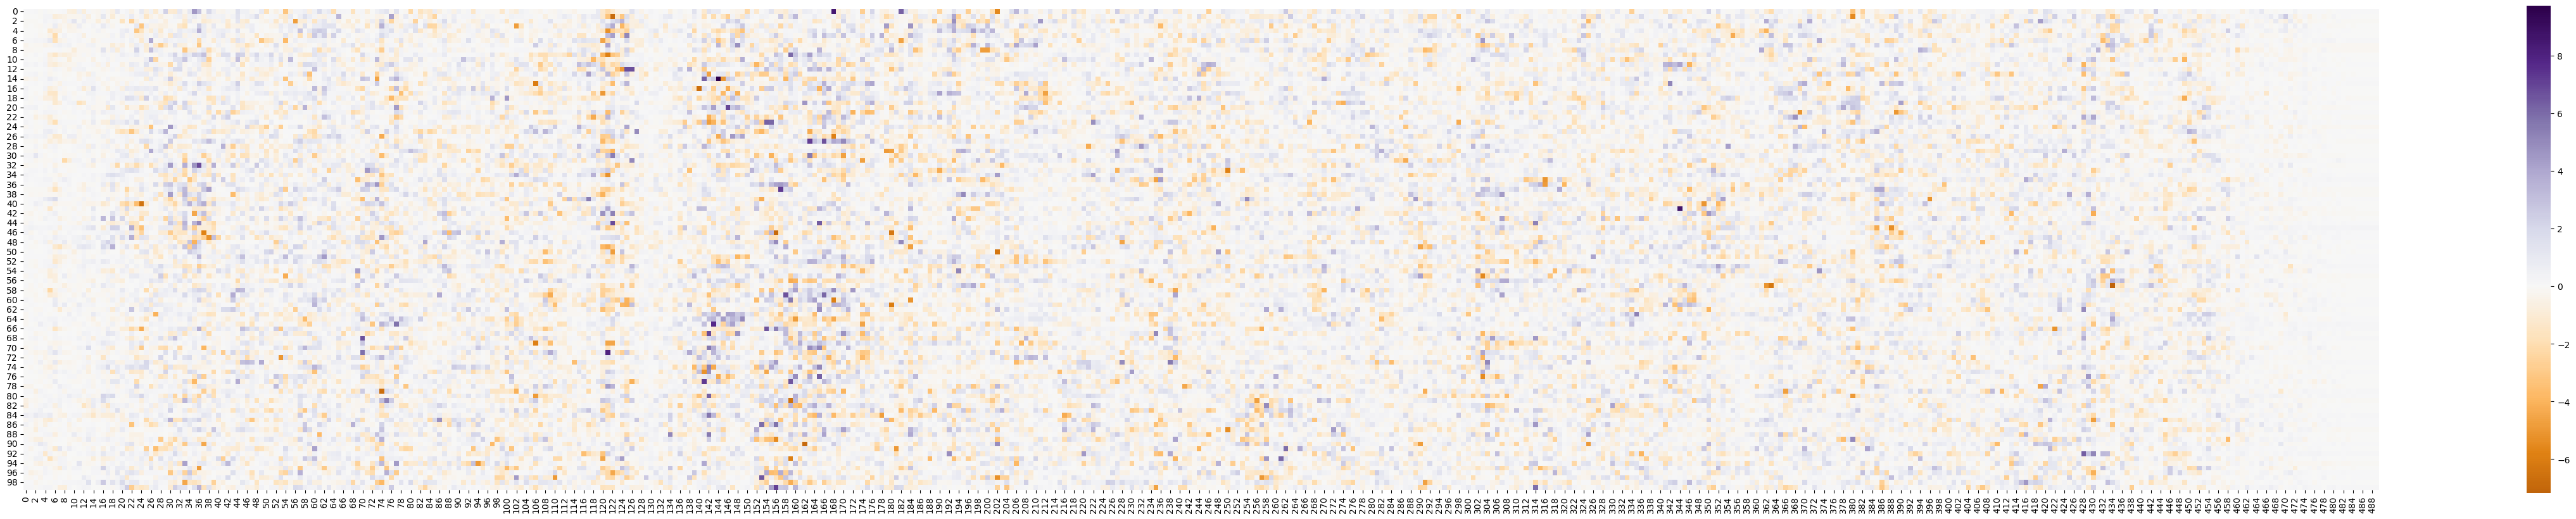

In [101]:
simple_heatmap(zscore(max_bag_diff_sub, axis=1), (60,10))

### Mean channel importance

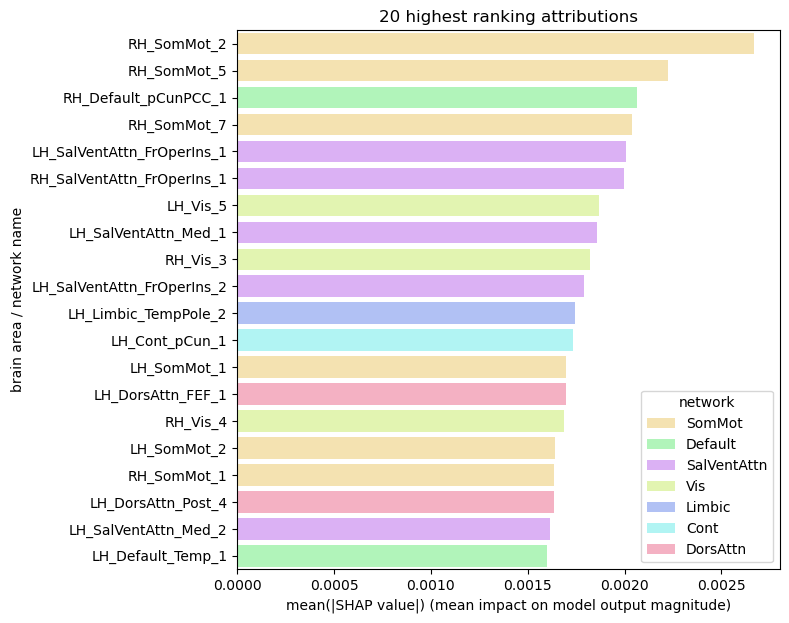

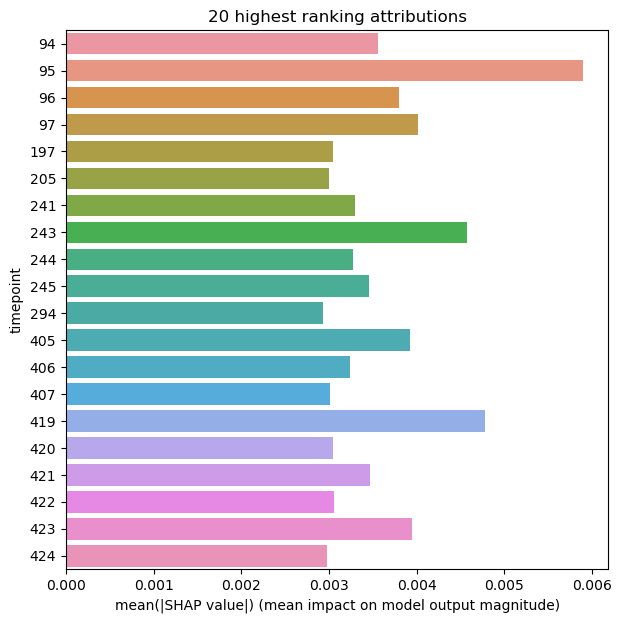

In [148]:
# young sub
viz.simple_local_explanation(young_sub, kind='parcellation')
viz.simple_local_explanation(young_sub, kind='timepoint')

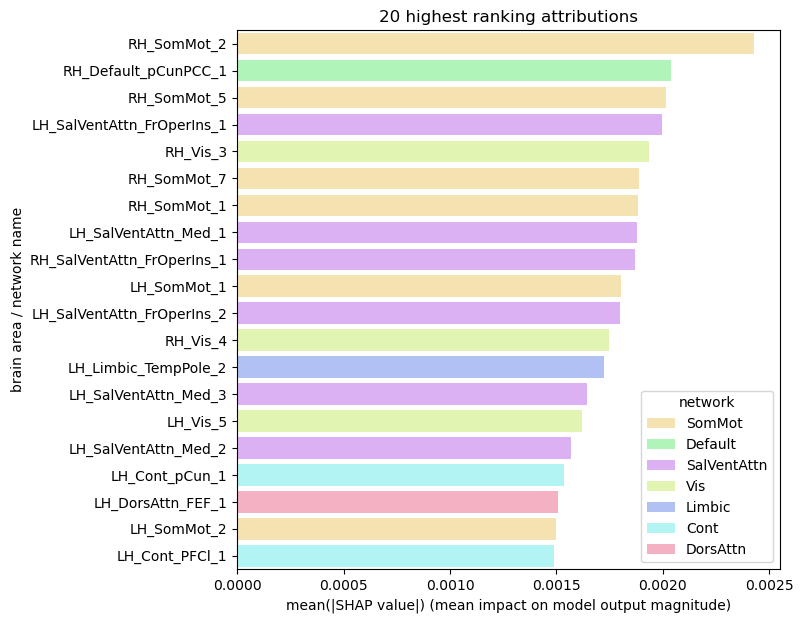

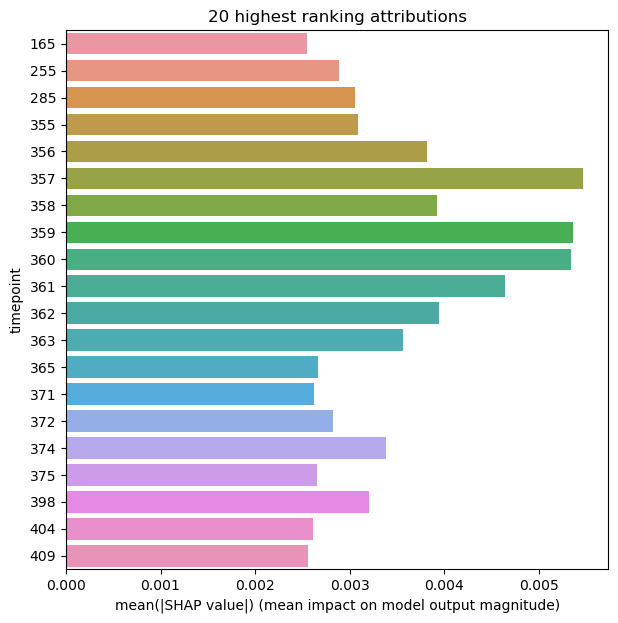

In [149]:
# old sub
viz.simple_local_explanation(old_sub, kind='parcellation')
viz.simple_local_explanation(old_sub, kind='timepoint')

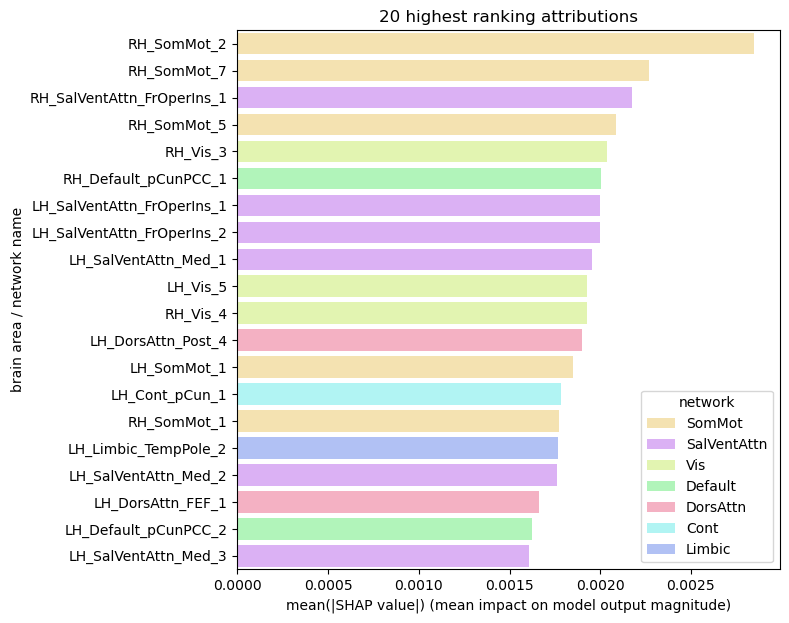

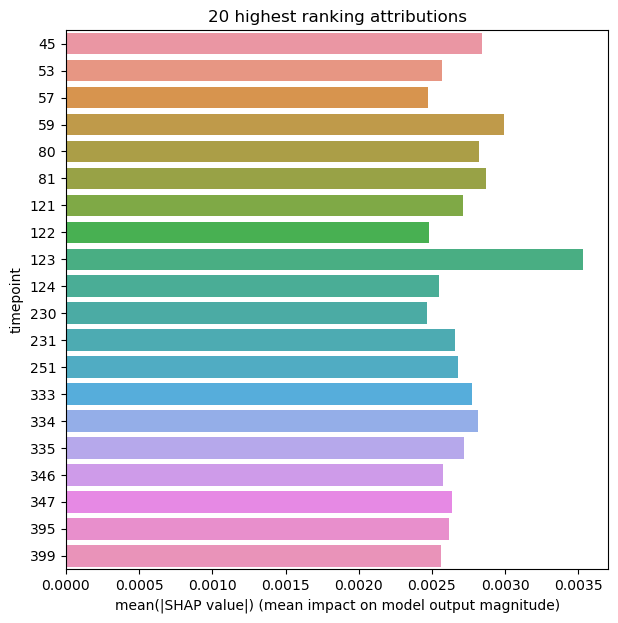

In [150]:
# younger prediction sub
viz.simple_local_explanation(younger_pred_sub, kind='parcellation')
viz.simple_local_explanation(younger_pred_sub, kind='timepoint')

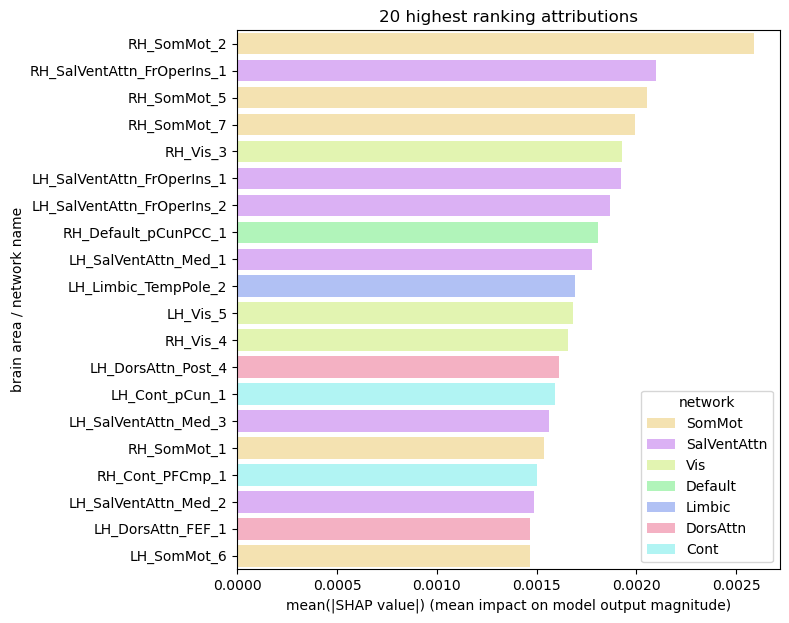

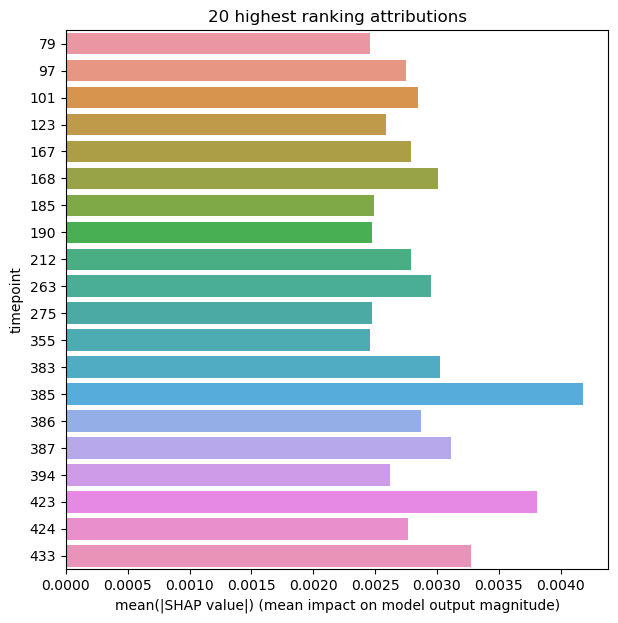

In [151]:
# older prediction sub
viz.simple_local_explanation(older_pred_sub, kind='parcellation')
viz.simple_local_explanation(older_pred_sub, kind='timepoint')

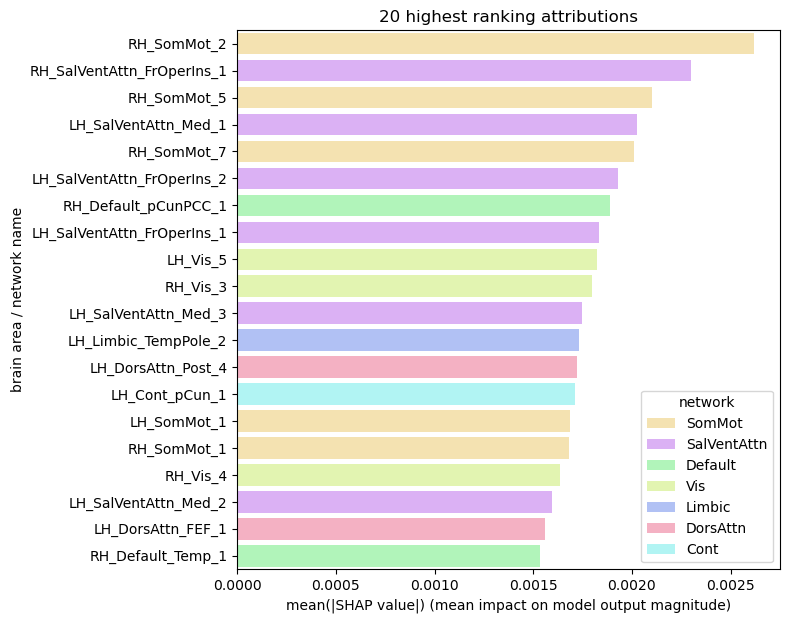

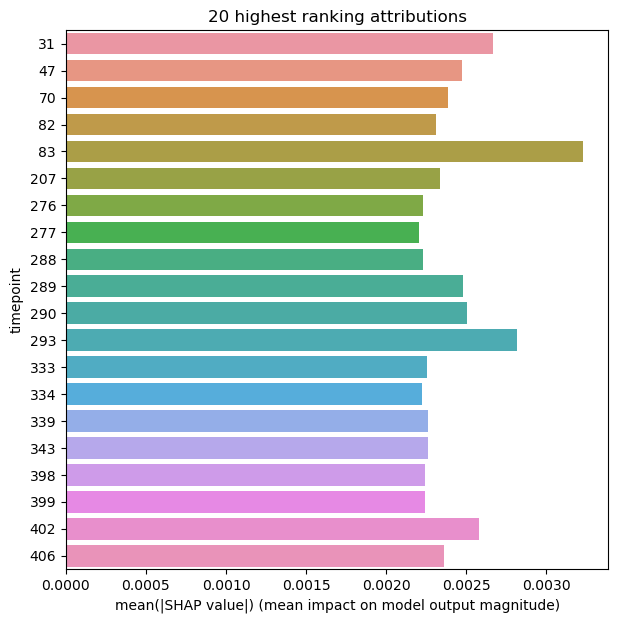

In [152]:
# minimal BAG difference sub
viz.simple_local_explanation(min_bag_diff_sub, kind='parcellation')
viz.simple_local_explanation(min_bag_diff_sub, kind='timepoint')

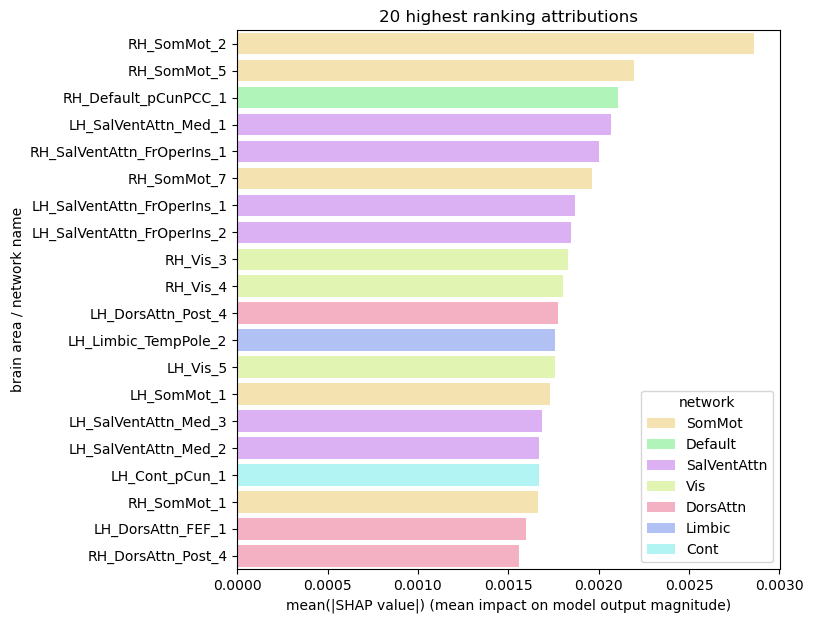

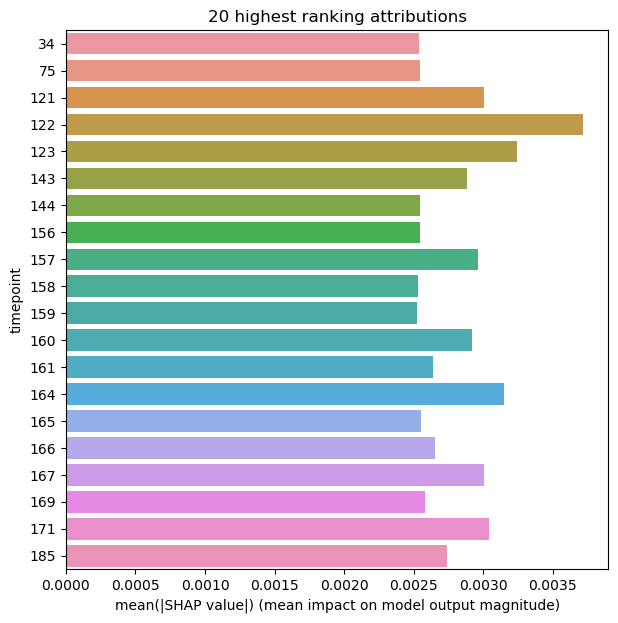

In [153]:
# maximal BAG difference sub
viz.simple_local_explanation(max_bag_diff_sub, kind='parcellation')
viz.simple_local_explanation(max_bag_diff_sub, kind='timepoint')

## Save visualisations

In [10]:
local_sub_ids = [1137757,1318155,1184162,1364474,1031078,1457519]
motion_ids = [1318155,1184162,1031078,1457519]

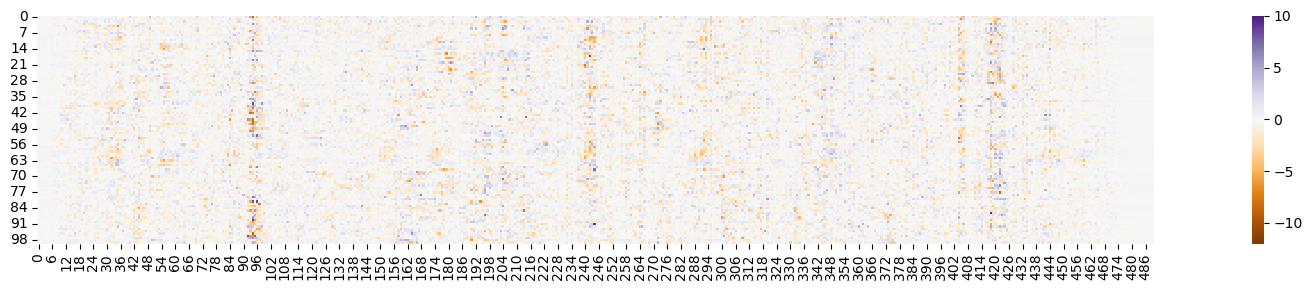

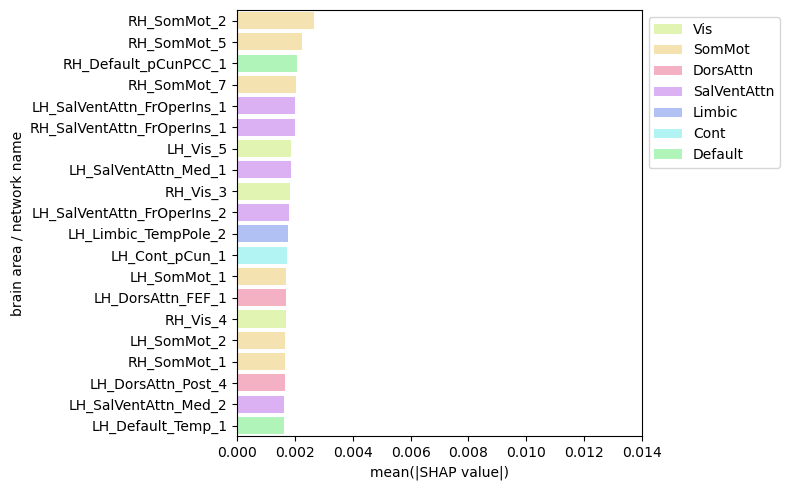

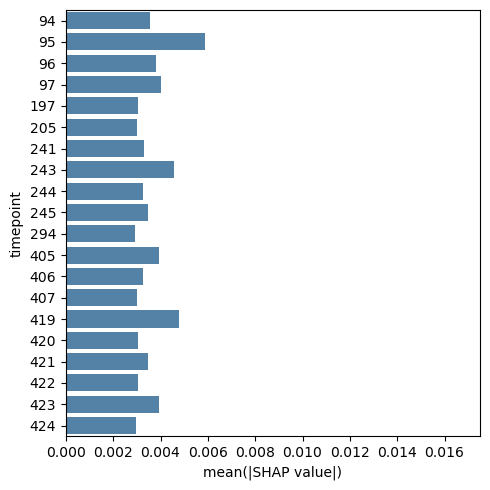

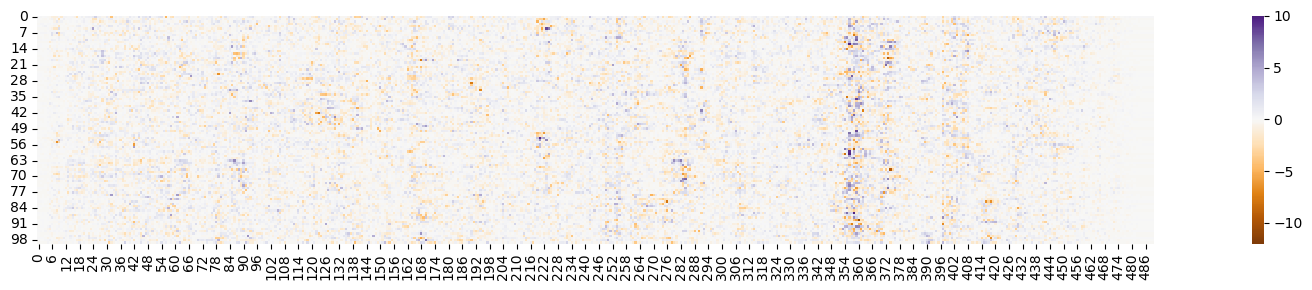

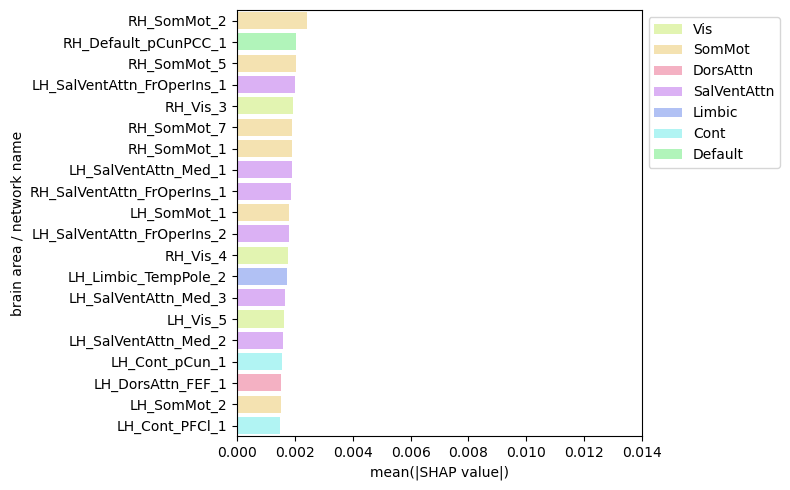

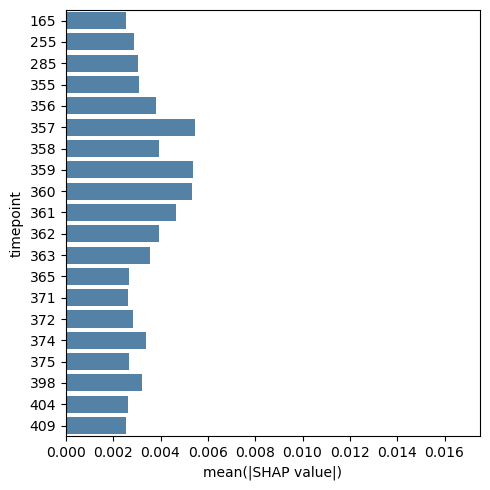

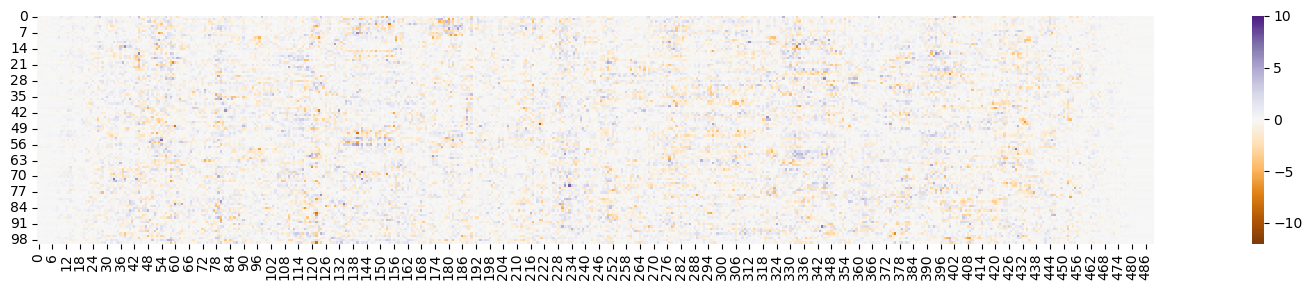

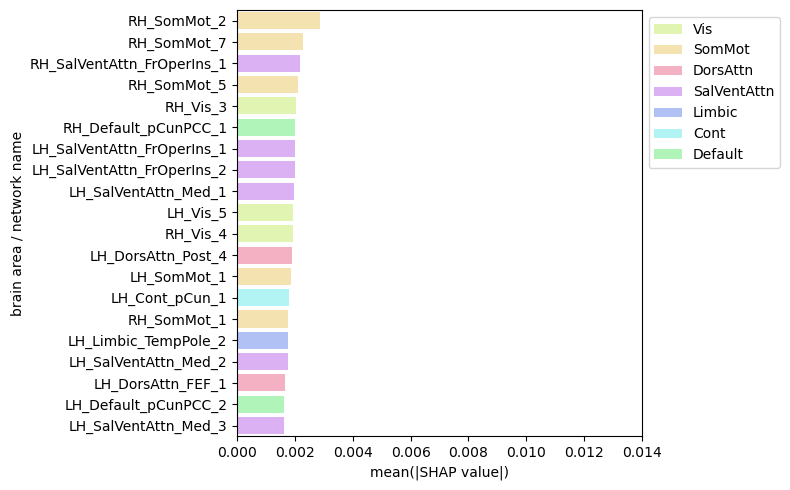

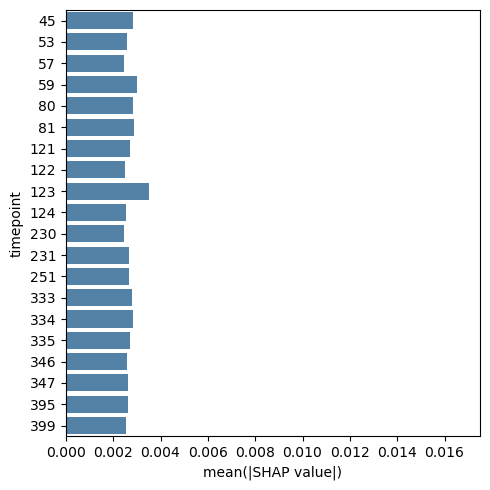

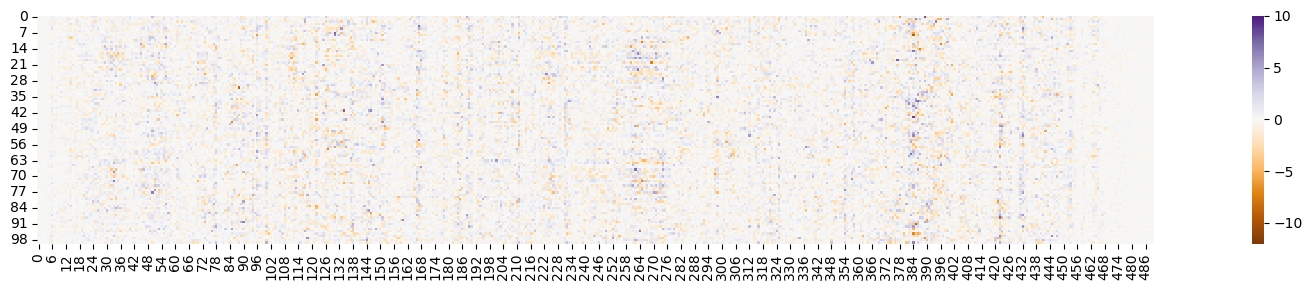

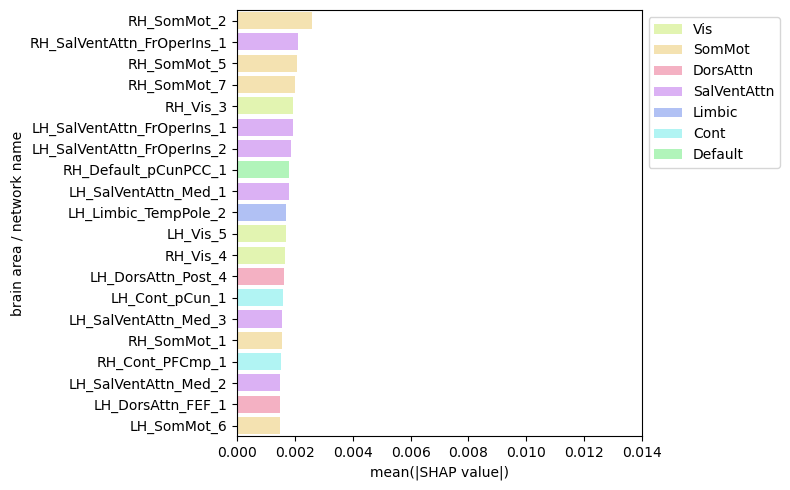

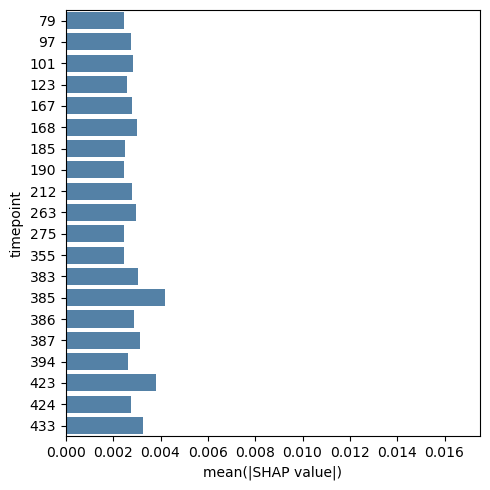

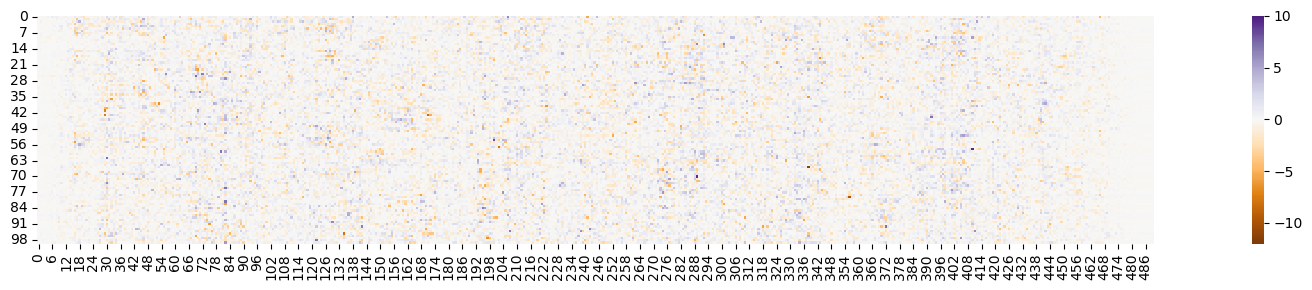

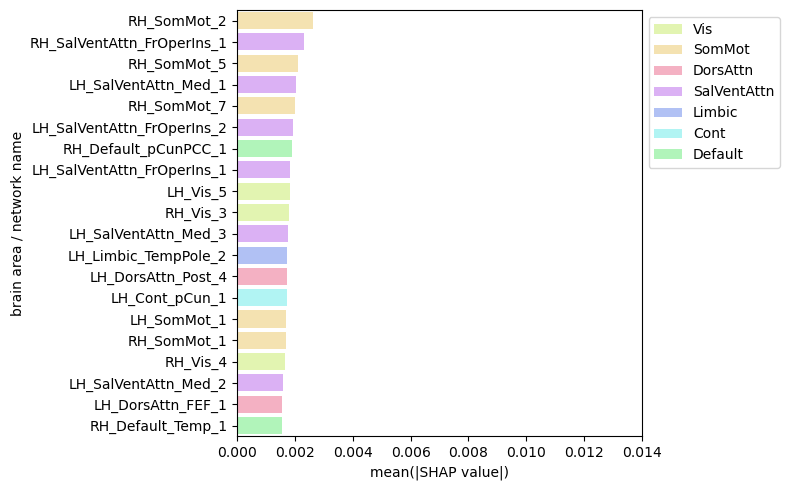

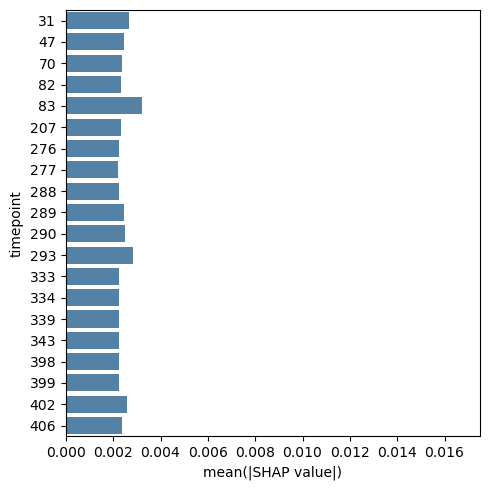

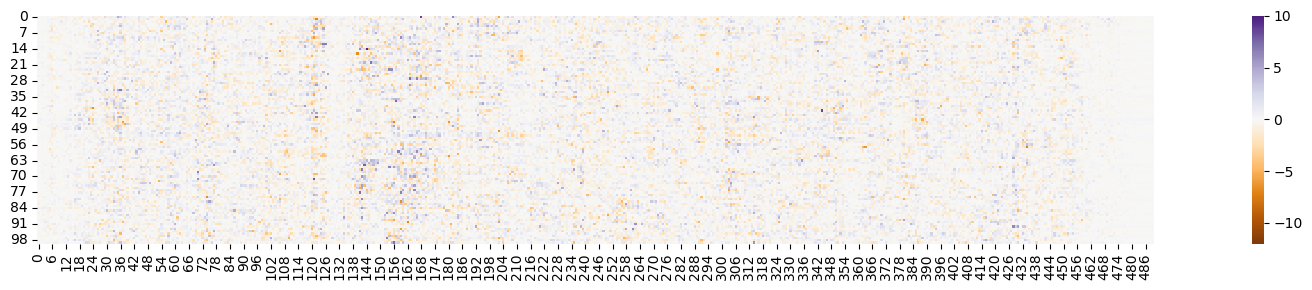

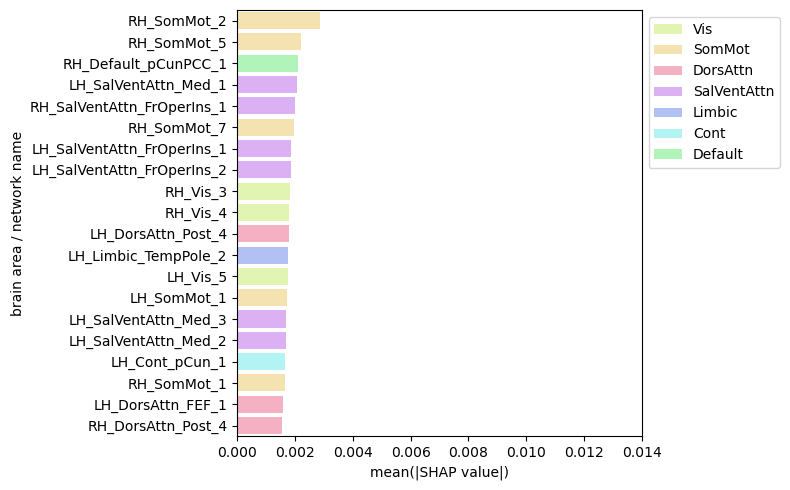

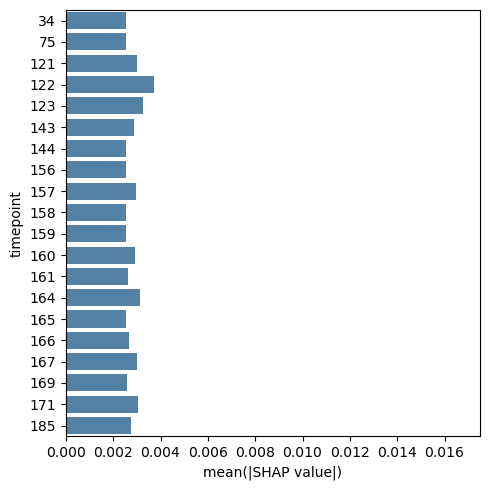

In [20]:
for id in local_sub_ids:
    viz.save_heatmap(deep_shap,id,save_name='heatmap_'+str(id)+'_deep.png')
    viz.save_parcel_explanation(deep_shap, id,
                               save_name=f'parcellation_shap_{id}_deep.png')
    viz.save_timepoint_explanation(deep_shap,id,
                               save_name=f'timepoint_shap_{id}_deep.png')

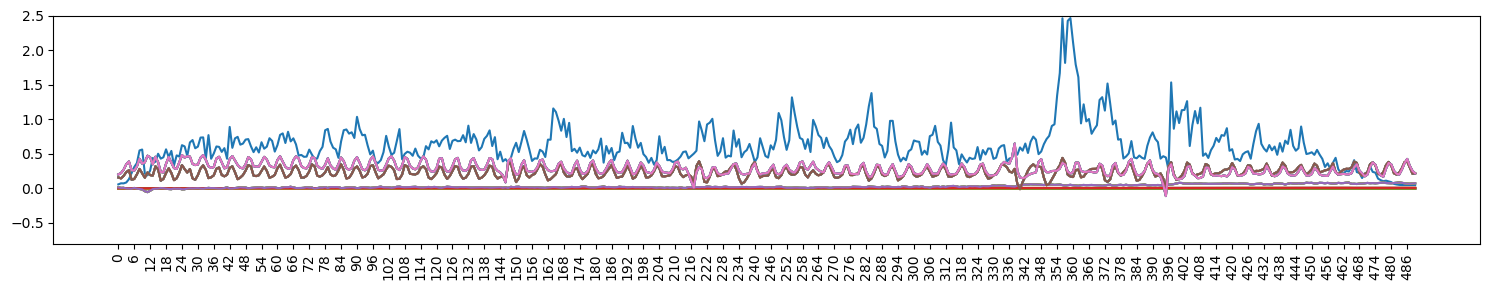

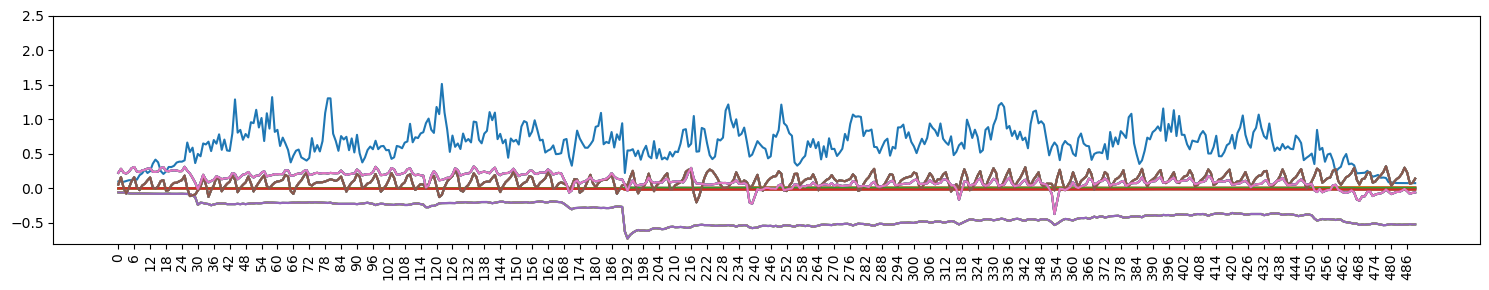

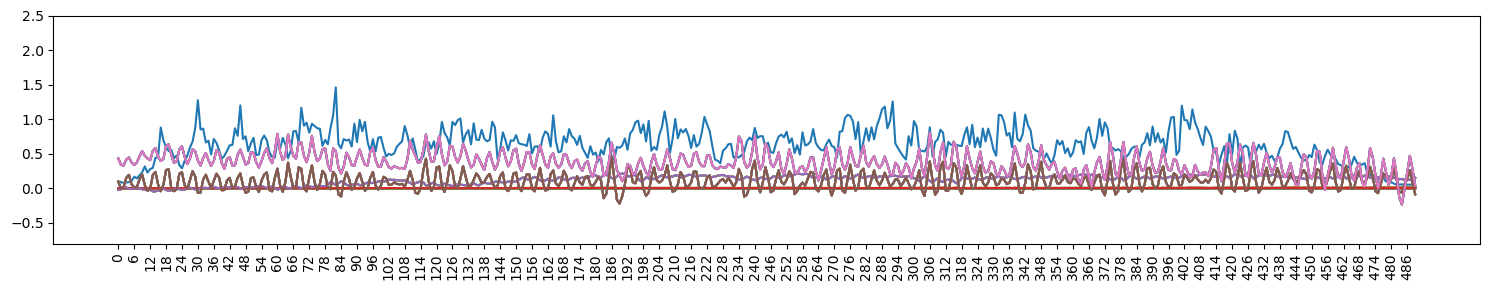

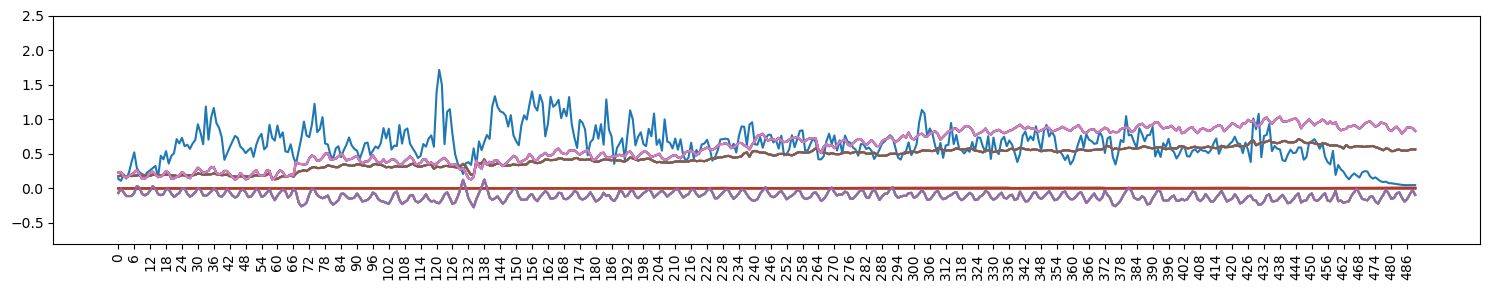

In [97]:
fig_path = '/home/laurar/brain_age_1D-CNN/viz/'
for id in motion_ids:
    mc_path = f'/home/laurar/brain_age_1D-CNN/data/schaefer/mc/prefiltered_func_data_mcf_{str(id)}.par'
    head_motion = np.loadtxt(mc_path)
    sub_array = utils.get_sub_shap(deep_shap, id)
    fig = plt.figure(figsize=(15,3))
    plt.xticks(range(0,490,6), rotation=90)
    plt.ylim(-0.8,2.5)
    plt.plot(np.mean(np.abs(zscore(sub_array, axis=1)), axis=0))
    for i in range(6):
        plt.plot(head_motion)
    fig.tight_layout()
    fig.savefig(fig_path+'motion_'+str(id)+'_deep.png')
    fig.show()